In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
from spice import Circuit, DcOp, Resistor, Mos, Diode
from spice.analysis import Contour

In [3]:
class DutContour:
    """ Stores a DUT and its contour results """
    def __init__(self, dut_cls):
        self.dut_cls = dut_cls
        self.xs = []
        self.ys = []
        self.dxs = []
        
    def run(self):        
        for k in range(11):
            vgs = k / 10.0
            dut = self.dut_cls(vgs)
            an = Contour(dut)
            x, y, dx = an.explore(xmin=-1.0, xmax=2.0, xstep=0.1)
            x=np.transpose(x)
            y=np.transpose(y)
            dx=np.transpose(dx)
            self.xs.append(x[0])
            self.ys.append(y[0])
            self.dxs.append(dx[0])

In [4]:
from spice.tests.test_nmos_inv import nmos_inv
n = DutContour(nmos_inv)
n.run()

In [5]:
from spice.tests.test_pmos_inv import pmos_inv
p = DutContour(pmos_inv)
p.run()

In [6]:
from spice.tests.test_cmos_inv import cmos_inv
c = DutContour(cmos_inv)
c.run()

In [7]:
def plots(c):
    fig, ax = plt.subplots()
    for k in range(len(c.xs)):
        ax.plot(c.xs[k], c.ys[k], label=k)
    # ax.set_ylim(-0.001,0.001)
    ax.legend()

    fig, ax = plt.subplots()
    for k in range(len(c.xs)):
        dys = np.diff(c.ys[k]) / 1e-2
        ax.plot(c.xs[k][:-1], dys, label=k)
    # ax.set_ylim(-1e-3,1e-3)
    ax.legend()

    fig, ax = plt.subplots()
    for k in range(len(c.xs)):
        ax.plot(c.xs[k], c.dxs[k], label=k)
    # ax.set_ylim(-20,20)
    ax.legend()

#     fig, ax = plt.subplots()
#     dys = -1* np.diff(c.ys[5]) / 1e-2
#     ax.plot(c.xs[5][:-1], c.ys[5][:-1]/dys, label=3)
#     ax.plot(c.xs[5], c.dxs[5], label=k)
#     ax.plot([-1.0,2.0],[0,0])
#     # plt.xlim(1.1,1.3)

#     fig, ax = plt.subplots()
#     dys = -1* np.diff(c.ys[5]) / 1e-2
#     ax.plot(c.xs[5][:-1], c.ys[5][:-1], label=3)
#     ax.plot([-1.0,2.0],[0,0])
#     # plt.plot(xs[5][:-1], ys[5][:-1]/dys, label=3)
#     # plt.xlim(1.1,1.3)
#     # plt.ylim(.001,.002)

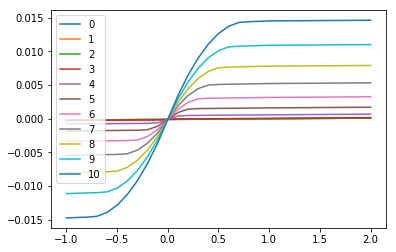

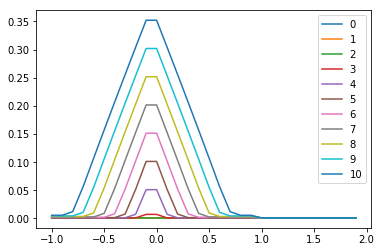

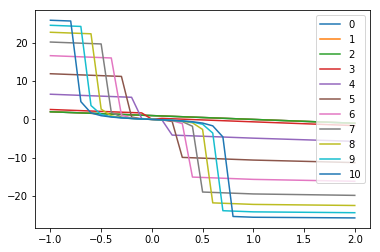

In [8]:
plots(n)

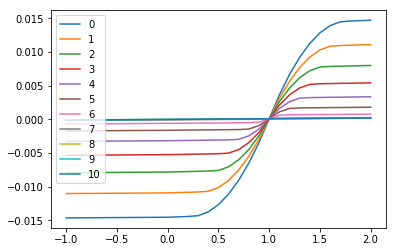

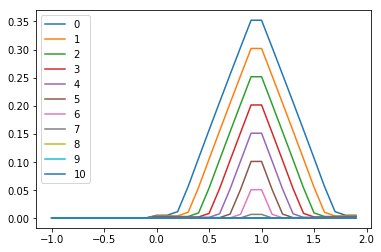

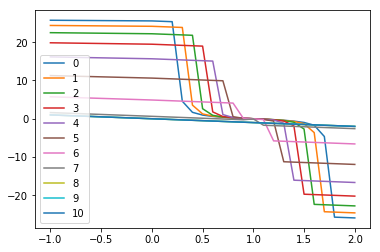

In [9]:
plots(p)

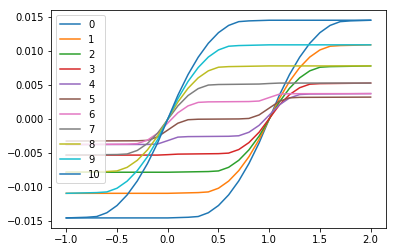

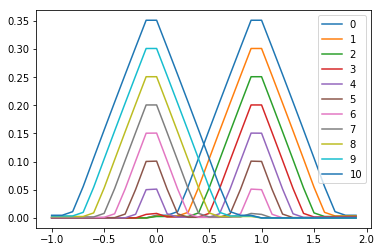

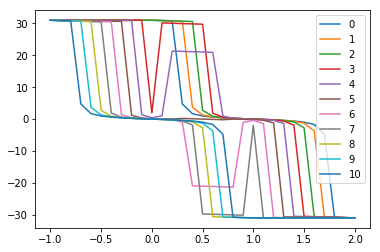

In [10]:
plots(c)